In [1]:
from ftplib import FTP
import numpy as np
import os
import pandas as pd
from datetime import datetime, timedelta, date
import xarray as xr
import pyinterp.backends.xarray
import pyinterp.fill
import netCDF4


###  1. Download data


In [2]:
today = date.today()
#today = date.fromisoformat('2023-04-15') # To get data from another day
numdays = 15

# Define spatial domain (!) should be better coded to use it from config.
lon_min = -2                              
lon_max = 10                                
lat_min = 36                                  
lat_max = 44                                    

# What data to download and where to put it
datasets = [
    'dataset-duacs-nrt-europe-al-phy-l3', 
    'dataset-duacs-nrt-europe-c2n-phy-l3', 
    'dataset-duacs-nrt-europe-h2b-phy-l3',
    'cmems_obs-sl_eur_phy-ssh_nrt_j3n-l3-duacs_PT0.2S',
    'cmems_obs-sl_eur_phy-ssh_nrt_s3a-l3-duacs_PT0.2S',
    'cmems_obs-sl_eur_phy-ssh_nrt_s3b-l3-duacs_PT0.2S',
    'cmems_obs-sl_eur_phy-ssh_nrt_s6a-hr-l3-duacs_PT0.2S',
]

inputs_location='/bettik/PROJECTS/pr-data-ocean/stellaa/NRT_BFN/input/'

# FTP connection to CMEMS server and data download
os.chdir('/bettik/PROJECTS/pr-data-ocean/stellaa/NRT_BFN/')
currdir=os.getcwd()

# Set user name and password
username = '*******'
password = '*******'

# Connect to the ftp server
ftp = FTP('nrt.cmems-du.eu',username,password)

# Choose dates to download
first_day = today - timedelta(days=numdays)
dates = pd.date_range(end = today, periods = numdays).to_pydatetime().tolist()

In [3]:
# Download all L3 products
from tools.ftp_transfer import ftp_cmems_download_month

for i in np.arange(0,len(datasets)):

    os.makedirs(inputs_location+today.strftime('%Y%m%d')+'/'+datasets[i], exist_ok = True)
    os.chdir(inputs_location+today.strftime('%Y%m%d')+'/'+datasets[i])

    ftp_cmems_download_month(ftp, '/Core/SEALEVEL_EUR_PHY_L3_NRT_OBSERVATIONS_008_059/', datasets[i], str(today.year), str(today.month))
    os.chdir(inputs_location+today.strftime('%Y%m%d')+'/'+datasets[i])

    if (today.month != first_day.month): # (!) only works when the assimilation duration doesn't span over more than two months
            ftp_cmems_download_month(ftp, '/Core/SEALEVEL_EUR_PHY_L3_NRT_OBSERVATIONS_008_059/', datasets[i], str(first_day.year), str(first_day.month))
            os.chdir(inputs_location+today.strftime('%Y%m%d')+'/'+datasets[i])

os.chdir(currdir)
print('Obs data downloaded successfully')

Retreiving data for nrt_europe_al_phy_l3_20230401_20230414.nc
Retreiving data for nrt_europe_al_phy_l3_20230402_20230414.nc
Retreiving data for nrt_europe_al_phy_l3_20230403_20230414.nc
Retreiving data for nrt_europe_al_phy_l3_20230404_20230414.nc
Retreiving data for nrt_europe_al_phy_l3_20230405_20230414.nc
Retreiving data for nrt_europe_al_phy_l3_20230406_20230414.nc
Retreiving data for nrt_europe_al_phy_l3_20230407_20230414.nc
Retreiving data for nrt_europe_al_phy_l3_20230408_20230414.nc
Retreiving data for nrt_europe_al_phy_l3_20230409_20230414.nc
Retreiving data for nrt_europe_al_phy_l3_20230410_20230414.nc
Retreiving data for nrt_europe_al_phy_l3_20230411_20230414.nc
Retreiving data for nrt_europe_al_phy_l3_20230412_20230414.nc
Retreiving data for nrt_europe_al_phy_l3_20230413_20230414.nc
Retreiving data for nrt_europe_c2n_phy_l3_20230401_20230414.nc
Retreiving data for nrt_europe_c2n_phy_l3_20230402_20230414.nc
Retreiving data for nrt_europe_c2n_phy_l3_20230403_20230414.nc
Retre

In [4]:
# Download DUACS L4 product
dataset_l4 = 'dataset-duacs-nrt-europe-merged-allsat-phy-l4'
print('Retreiving data for dataset '+dataset_l4)

os.makedirs(inputs_location+today.strftime('%Y%m%d')+'/'+dataset_l4, exist_ok = True)
os.chdir(inputs_location+today.strftime('%Y%m%d')+'/'+dataset_l4)

ftp_cmems_download_month(ftp, '/Core/SEALEVEL_EUR_PHY_L4_NRT_OBSERVATIONS_008_060/', dataset_l4, str(today.year), str(today.month))
os.chdir(inputs_location+today.strftime('%Y%m%d')+'/'+dataset_l4)

if (today.month != first_day.month): # (!) only works when the assimilation duration doesn't span over more than two months
    ftp_cmems_download_month(ftp, '/Core/SEALEVEL_EUR_PHY_L4_NRT_OBSERVATIONS_008_060/', dataset_l4, str(first_day.year), str(first_day.month))

os.chdir(currdir)
print('DUACS L4 data downloaded successfully')

ftp.quit()

Retreiving data for dataset dataset-duacs-nrt-europe-merged-allsat-phy-l4
Retreiving data for nrt_europe_allsat_phy_l4_20230401_20230407.nc
Retreiving data for nrt_europe_allsat_phy_l4_20230402_20230408.nc
Retreiving data for nrt_europe_allsat_phy_l4_20230403_20230409.nc
Retreiving data for nrt_europe_allsat_phy_l4_20230404_20230410.nc
Retreiving data for nrt_europe_allsat_phy_l4_20230405_20230411.nc
Retreiving data for nrt_europe_allsat_phy_l4_20230406_20230412.nc
Retreiving data for nrt_europe_allsat_phy_l4_20230407_20230413.nc
Retreiving data for nrt_europe_allsat_phy_l4_20230408_20230414.nc
Retreiving data for nrt_europe_allsat_phy_l4_20230409_20230412.nc
Retreiving data for nrt_europe_allsat_phy_l4_20230410_20230413.nc
Retreiving data for nrt_europe_allsat_phy_l4_20230411_20230414.nc
Retreiving data for nrt_europe_allsat_phy_l4_20230412_20230412.nc
Retreiving data for nrt_europe_allsat_phy_l4_20230413_20230413.nc
Retreiving data for nrt_europe_allsat_phy_l4_20230414_20230414.nc
DU

'221 Goodbye.'

### 2. Compute boundary conditions

In [5]:
# Rework the DUACS dataset for optimal boundary conditions : extrapolate data to fill coasts. 
# Then a mask is used in BFN to select only ocean and avoid awkward 0 values around coasts

ds = xr.open_mfdataset('/bettik/PROJECTS/pr-data-ocean/stellaa/NRT_BFN/input/'+today.strftime('%Y%m%d')+'/dataset-duacs-nrt-europe-merged-allsat-phy-l4/*.nc')
ds = ds.sel(longitude = slice(lon_min,lon_max), latitude = slice(lat_min,lat_max))

longitude = ds.longitude.values
latitude = ds.latitude.values

x_axis = pyinterp.Axis(longitude)
y_axis = pyinterp.Axis(latitude)

adt_filled = np.zeros((len(ds.time), len(longitude), len(latitude)))
adt_filled_upright = np.zeros((len(ds.time), len(latitude), len(longitude)))

for t in np.arange(len(ds.time)):
    has_converged, adt_filled[t] = pyinterp.fill.gauss_seidel(pyinterp.Grid2D(x_axis, y_axis, ds.adt[t].values.T)) # values are transposed you have to T them back
    adt_filled_upright[t] = adt_filled[t].T

ds['adt_full'] = (['time', 'latitude', 'longitude'], adt_filled_upright)

ds.to_netcdf('/bettik/PROJECTS/pr-data-ocean/stellaa/NRT_BFN/input/'+today.strftime('%Y%m%d')+'/duacs_l4_filled.nc', mode = 'w')

### 3. Run data assimilation with BFN-QG

In [6]:
dir_massh = '/bettik/PROJECTS/pr-data-ocean/stellaa/MASSH/mapping'
import sys
sys.path.append(dir_massh)

In [7]:
# Config
path_config = '/bettik/PROJECTS/pr-data-ocean/stellaa/NRT_BFN/NRT_BFN_A1_config.py'  
from src import exp
config = exp.Exp(path_config)

name_experiment: NRT_BFN_A1
saveoutputs: True
name_exp_save: NRT_BFN_A1
path_save: /bettik/PROJECTS/pr-data-ocean/stellaa/NRT_BFN/output/20230415/
tmp_DA_path: ./scratch/NRT_BFN_A1
init_date: 2023-04-07 00:00:00
final_date: 2023-04-14 00:00:00
assimilation_time_step: 3:00:00
saveoutput_time_step: 3:00:00
flag_plot: 0
write_obs: False
path_obs: ./scratch/NRT_BFN_A1
name_lon: lon
name_lat: lat
name_time: time
plot_time_step: 1 day, 0:00:00
time_obs_min: None
time_obs_max: None
compute_obs: False

NAME_OBSOP is not set in the configuration file
NAME_BASIS is not set in the configuration file
NAME_DIAG is not set in the configuration file


In [8]:
# State
from src import state as state
State = state.State(config)

super: GRID_GEO
lon_min: -2.0
lon_max: 10.0
lat_min: 36.0
lat_max: 44.0
dlon: 0.0625
dlat: 0.0625
name_init_mask: /bettik/PROJECTS/pr-data-ocean/stellaa/NRT_BFN/input/20230415/duacs_l4_filled.nc
name_var_mask: {'lon': 'longitude', 'lat': 'latitude', 'var': 'adt'}



In [9]:
# Obs
from src import obs as obs
dict_obs = obs.Obs(config,State)

Observation information will be saved in dict_obs_ALG_C2N_H2B_J3N_S3A_S3B_S6A_20230407_20230414_0_359_36_44.txt

ALG:
super: OBS_SSH_NADIR
path: /bettik/PROJECTS/pr-data-ocean/stellaa/NRT_BFN/input/20230415/dataset-duacs-nrt-europe-al-phy-l3/
name_time: time
name_lon: longitude
name_lat: latitude
name_var: {'SSH': 'sla_unfiltered'}
varmax: 100.0
sigma_noise: None
add_mdt: True
substract_mdt: None
path_mdt: /bettik/PROJECTS/pr-data-ocean/stellaa/NRT_BFN/input/cmems_obs-sl_med_phy-mdt_my_l4-0.0417deg_P20Y_1679318915395.nc
name_var_mdt: {'lon': 'longitude', 'lat': 'latitude', 'mdt': 'mdt'}
nudging_params_ssh: {'sigma': 0, 'K': 0.7, 'Tau': datetime.timedelta(days=1)}
detrend: False

--> 27 tracks selected

C2N:
super: OBS_SSH_NADIR
path: /bettik/PROJECTS/pr-data-ocean/stellaa/NRT_BFN/input/20230415/dataset-duacs-nrt-europe-c2n-phy-l3/
name_time: time
name_lon: longitude
name_lat: latitude
name_var: {'SSH': 'sla_unfiltered'}
varmax: 100.0
sigma_noise: None
add_mdt: True
substract_mdt: None


In [10]:
# Model
from src import mod as mod
Model = mod.Model(config,State)

super: MOD_QG1L_NP
name_var: {'SSH': 'ssh', 'PV': 'pv'}
name_init_var: {}
dir_model: None
var_to_save: None
dtmodel: 600
upwind: 3
upwind_adj: None
Reynolds: False
qgiter: 20
qgiter_adj: None
c0: 1.5
filec_aux: None
name_var_c: {'lon': '', 'lat': '', 'var': ''}
cmin: None
cmax: None
only_diffusion: False
path_mdt: None
name_var_mdt: {'lon': '', 'lat': '', 'mdt': '', 'mdu': '', 'mdv': ''}
g: 9.81



In [11]:
# Bondary Conditions
from src import bc as bc
Bc = bc.Bc(config)

super: BC_EXT
file: /bettik/PROJECTS/pr-data-ocean/stellaa/NRT_BFN/input/20230415/duacs_l4_filled.nc
name_lon: longitude
name_lat: latitude
name_time: time
name_var: {'SSH': 'adt_full'}
dist_sponge: 30

<xarray.Dataset>
Dimensions:    (time: 14, latitude: 64, nv: 2, longitude: 96)
Coordinates:
  * time       (time) datetime64[ns] 2023-04-01 2023-04-02 ... 2023-04-14
  * latitude   (latitude) float32 36.06 36.19 36.31 36.44 ... 43.69 43.81 43.94
  * longitude  (longitude) float32 -1.938 -1.812 -1.688 ... 9.688 9.812 9.938
  * nv         (nv) int32 0 1
Data variables: (12/14)
    crs        (time) int32 dask.array<chunksize=(14,), meta=np.ndarray>
    lat_bnds   (time, latitude, nv) float32 dask.array<chunksize=(14, 64, 2), meta=np.ndarray>
    lon_bnds   (time, longitude, nv) float32 dask.array<chunksize=(14, 96, 2), meta=np.ndarray>
    sla        (time, latitude, longitude) float64 dask.array<chunksize=(14, 64, 96), meta=np.ndarray>
    err_sla    (time, latitude, longitude) float64 d

In [12]:
# Inversion
from src import inv as inv
inv.Inv(config,State,Model,dict_obs=dict_obs,Bc=Bc)

super: INV_BFN
window_size: 7 days, 0:00:00
window_output: 3 days, 0:00:00
propagation_timestep: 3:00:00
window_overlap: True
criterion: 0.001
max_iteration: 10
save_trajectory: False
dist_scale: 10
save_obs_proj: False
path_save_proj: None
use_bc_as_init: False
scalenudg: None

Loop from 2023-04-07 to 2023-04-14 : 10 iterations in 0:12:00.059435 seconds



### 4. Process results

In [13]:
# Load the last week and take daily averages
bfn_output = xr.open_mfdataset('/bettik/PROJECTS/pr-data-ocean/stellaa/NRT_BFN/output/'+today.strftime('%Y%m%d')+'/*.nc', concat_dim='time', combine='nested')
bfn_output_dates = bfn_output.assign(time=pd.to_datetime(bfn_output.time.dt.date))
last_week = bfn_output_dates.where(bfn_output_dates.time >= pd.to_datetime(today-timedelta(days=6)), drop =True)
daily_mean_ssh = last_week.groupby("time").mean("time")

In [14]:
# A few physical parameters for computations
g=9.81 # m/s2
c0=1.5, # phase speed of baroclinic 1st mode - computed from LR = 15km in the Med. sea (!) Area-dependant!
earth_rad=6.371e6 # 6371km
earth_w=2*np.pi/86400 # rad/s

# Create the dy, dx and f grids based on physical parameters
lon=daily_mean_ssh.lon.values
lat=daily_mean_ssh.lat.values
x, y = np.meshgrid(lon, lat)

dy = np.ones(y.shape)
dx = np.ones(x.shape)

dy[1:-1,:]=earth_rad*2*np.pi/360*(y[1:-1,:]-y[0:-2,:])
dx[:,1:-1]=earth_rad*2*np.pi/360*(x[:,1:-1]-x[:,0:-2])*np.cos(((y[:,1:-1]+y[:,0:-2])/2)*np.pi/180)

# Neumann condition at boundaries
dy[0,:]=dy[1,:]
dy[-1,:]=dy[-2,:]
dx[:,0]=dx[:,1]
dx[:,-1]=dx[:,-2]

f=2*earth_w*np.sin(y*np.pi/180)

In [15]:
# U, V & PV computation
u=np.zeros((len(daily_mean_ssh.time), len(lat), len(lon)))
v=np.zeros((len(daily_mean_ssh.time), len(lat), len(lon)))
xi_norm=np.zeros((len(daily_mean_ssh.time), len(lat), len(lon)))

from tools.vars import h2uv, h2rv

for t in np.arange(len(daily_mean_ssh.time)):
    (u[t, :, :], v[t, :, :]) = h2uv(ssh = daily_mean_ssh.ssh[t, :, :], dy = dy, dx = dx, g = g, f = f)
    xi_norm[t, :, :] = h2rv(ssh = daily_mean_ssh.ssh[t, :, :], dy = dy, dx = dx, g = g, f = f)

daily_mean_ssh['u'] = (['time', 'lat', 'lon'],  u)
daily_mean_ssh['v'] = (['time', 'lat', 'lon'],  v)
daily_mean_ssh['xi_norm'] = (['time', 'lat', 'lon'],  xi_norm)

In [16]:
# Save final netcdf files 
os.makedirs('/bettik/PROJECTS/pr-data-ocean/stellaa/NRT_BFN/maps/'+today.strftime('%Y%m%d')+'/', exist_ok = True)
for d in daily_mean_ssh.time.values:
    date = pd.to_datetime(d)
    ds=daily_mean_ssh.where(daily_mean_ssh.time == d, drop=True)
    ds.to_netcdf('/bettik/PROJECTS/pr-data-ocean/stellaa/NRT_BFN/maps/'+today.strftime('%Y%m%d')+'/NRT_BFN_'+date.strftime('%Y%m%d')+'.nc', mode = 'w')

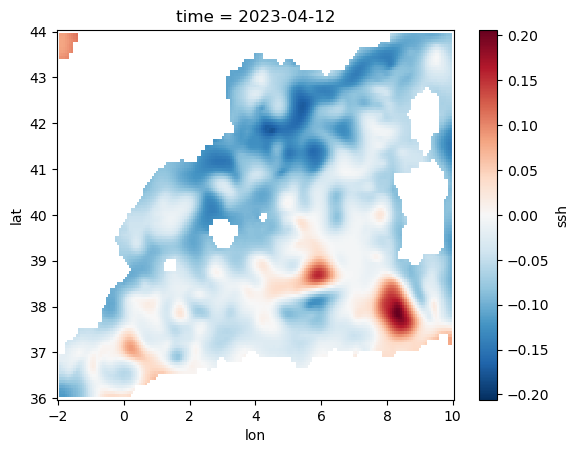

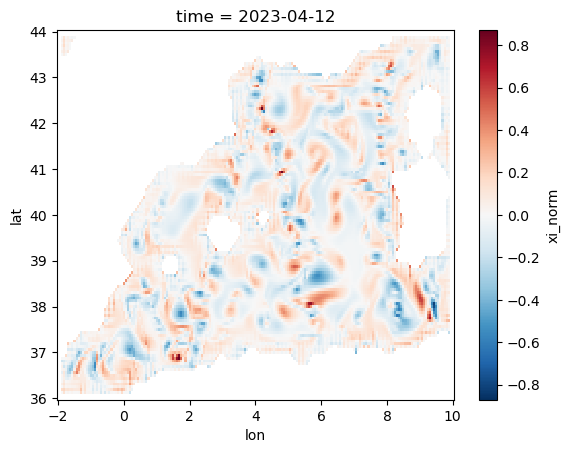

In [21]:
# An example map:
import matplotlib.pyplot as plt
ds['ssh'].plot()
plt.show()
ds['xi_norm'].plot()
plt.show()

### 5. Upload maps

In [24]:
os.chdir('/bettik/PROJECTS/pr-data-ocean/stellaa/NRT_BFN/')
currdir=os.getcwd()

# Set user name and password
username = '*******'
password = '*******'

# Connect to the ftp server
ftp = FTP('ftp.ifremer.fr',username,password)
ftp.cwd('MEDSSH_BFN')

ftp.mkd(today.strftime('%Y%m%d')+'_example')
ftp.cwd(today.strftime('%Y%m%d')+'_example')

# put the file in the directory on ftp
for d in pd.to_datetime(daily_mean_ssh.time.values):
    ftp.storbinary('STOR BFN_CSWOT_'+d.strftime('%Y%m%d')+'.nc', open('/bettik/PROJECTS/pr-data-ocean/stellaa/NRT_BFN/maps/'+today.strftime('%Y%m%d')+'/NRT_BFN_'+d.strftime('%Y%m%d')+'.nc', 'rb'))

print('Files in the directory :')
ftp.nlst()

Files in the directory :


['BFN_CSWOT_20230409.nc',
 'BFN_CSWOT_20230410.nc',
 'BFN_CSWOT_20230411.nc',
 'BFN_CSWOT_20230412.nc']

In [25]:
print('Closing connexion :')
ftp.quit()

Closing connexion :


'221 Goodbye.'